# Анализ А/В-теста для интернет-магазина
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

<b> Часть 1. Приоритизация гипотез </b>

Задача:
- Приоритизировать гипотезы, применив фреймворки ICE и RICE.


<b> Часть 2. Анализ A/B-теста </b>

Задача:
- Проанализировать A/B-тест.

In [2]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import timedelta
import datetime as dt

## Приоритизация гипотез

In [4]:
# загрузим файл с 9 гипотезами по увеличению выручки интернет-магазина
pd.set_option('display.max_colwidth', None)
hypothesis = pd.read_csv(path+'hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков в таблице нет, типы данных соответствуют требуемым (гипотеза - текст, метрики - числа), значит, можно работать с файлом.

In [6]:
hypothesis.loc[:, 'Hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

### Приоритизация гипотез, применяя ICE

Формула для расчета приоритета гипотез ICE: 
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [7]:
# добавим столбец ICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [8]:
hypothesis.loc[8, 'Hypothesis']

'Запустить акцию, дающую скидку на товар в день рождения'

<b> Вывод 1.1: </b> провела приоритезацию гипотез, применив фреймворк ICE. Топ-3 гипотез по величение ICE: 8, 0 и 7.

### Приоритизация гипотез, применяя RICE

Формула для расчета приоритета гипотез RICE: 
$$RICE = \frac{Reach * Impact * Confidence}{Efforts}$$

In [9]:
# добавим столбец RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [10]:
hypothesis.loc[7, 'Hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

<b> Вывод 1.2: </b> провела приоритезацию гипотез, применив фреймворк RICE. Топ-3 гипотез по величение RICE: 7, 2, 0 и 6.

<b> Вывод 1: </b> Изучила файл с 9 гипотезами по увеличению выручки интернет-магазина. Применила фреймворки ICE и RICE для приоритизации гипотез.

По ICE получила такой топ-3 - 8, 0, 7:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

По RICE получила следующий топ-3 - 7, 2, 0 и 6:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Как видим, топ-3 гипотез различаются в зависимости от применяемого фреймворка для приоритизации. В случае ICE учитываются показатели гипотез - Влияние, Уверенность, Усилия. В случае RICE - предыдущие показатели гипотез плюс Охват. Охват изменений - важный показатель оценки гипотез, поэтому в нашем случае будем использовать RICE.

Гипотеза 7 имеет наибольший охват (скорее всего применялась 10-балльная шкала), отсюда и такой высокий приоритет. Следующие гипотезы в топе - 2, пара 0 и 6 - имеют оценку в 2 раза ниже.

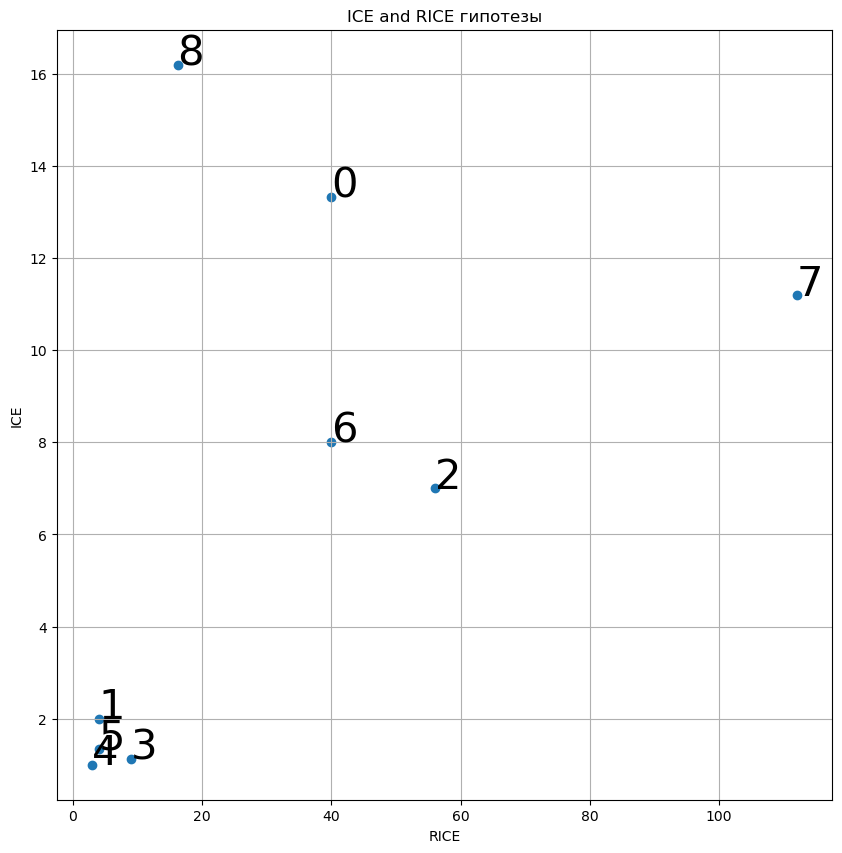

In [11]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()

## Анализ A/B-теста

Сначала загрузим данные из файла с результатами A/B-теста и проверим их корректность.

In [12]:
orders = pd.read_csv(path+'orders.csv')
visitors = pd.read_csv(path+'visitors.csv')

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
# изменю тип данных дат
orders['date'] = orders['date'].astype('datetime64[D]')

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
print('Начальная дата {}, конечная дата {}'.format(orders['date'].min(), orders['date'].max()))

Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
# изменю тип данных дат
visitors['date'] = visitors['date'].astype('datetime64[D]')

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [24]:
print('Начальная дата {}, конечная дата {}'.format(visitors['date'].min(), visitors['date'].max()))

Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00


Данные выгрузила. Изменила типы данных в столбцах с датами, первая и последняя даты совпадают. ДАлее проверю корректиность распределения на А/В группы.

In [25]:
# кол-во посетителей и покупок в группах А и В
visitors_A = visitors[visitors['group']=='A']['visitors'].sum()
visitors_B = visitors[visitors['group']=='B']['visitors'].sum()
purchases_A = len(orders[orders['group']=='A'])
purchases_B = len(orders[orders['group']=='B'])

print('Кол-во посетителей гр.А {}, \nКол-во посетителей гр.В {}, \nКол-во покупок гр.А {}, \nКол-во покупок гр.В {}.\n'.
     format(visitors_A, visitors_B, purchases_A, purchases_B))

print('Суммарное кол-во посетителей гр.А и В {}, \nСуммарное кол-во покупок гр.А и В {}.\n'.
     format(visitors_A + visitors_B, purchases_A + purchases_B))

# начальная и конечная конверсии
print('Начальная конверсия (гр.А): {:.3f}, \nКонечная конверсия (гр.В): {:.3f}.'
      .format(purchases_A/visitors_A, purchases_B/visitors_B))

Кол-во посетителей гр.А 18736, 
Кол-во посетителей гр.В 18916, 
Кол-во покупок гр.А 557, 
Кол-во покупок гр.В 640.

Суммарное кол-во посетителей гр.А и В 37652, 
Суммарное кол-во покупок гр.А и В 1197.

Начальная конверсия (гр.А): 0.030, 
Конечная конверсия (гр.В): 0.034.


In [26]:
# конверсия выросла, посмотрим насколько
print('ИЗменение конверсии: {:.3f}'.format(abs(1-((purchases_A/visitors_A)/(purchases_B/visitors_B)))))

ИЗменение конверсии: 0.121


Ссылка на расчет выборки:
https://www.evanmiller.org/ab-testing/sample-size.html#!3;80;5;12.1;1

Получила, что для набора: начальная конверсия в 3%, изменение конверсии в 12.1%, мощности 80% и уровня стат. значимости 5% - необходимый размер выборки 35269. При этом наша выборка на 37652. Значит, количество для А/В теста подобрано корректно. ДАлее проверить есть ли стат. значимая разница между группами А и В:

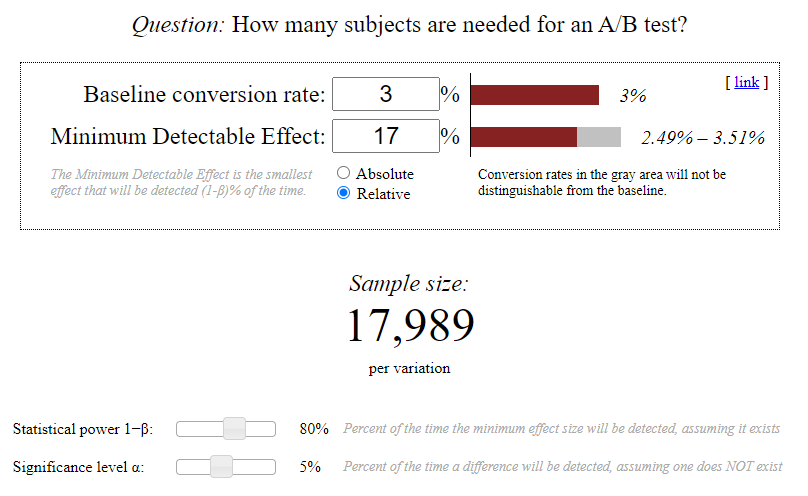

In [27]:
# H0: разница в кол-ве посетителей групп А и В статистически не значима
# Н1: разница в кол-ве посетителей групп А и В статистически значима

# проведем непараметрический тест Уилкоксона-Манна-Уитни
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])

alpha = 0.05 # уровень стат. значимости

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в кол-ве посетителей групп A и B статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница в кол-ве посетителей групп А и B статистически НЕ значима')

p-value:  0.7301376549390499
Не получилось отвергнуть нулевую гипотезу: разница в кол-ве посетителей групп А и B статистически НЕ значима


Получила, что выборка для А/В теста подобрана корректно (кол-во больше необходимого, статистически значимой разницы между групп А и В нет). Значит, можем аннализировать результаты А/В-теста.

In [28]:
a = orders.groupby('visitorId')['group'].nunique().sort_values(ascending=False)
a

visitorId
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [29]:
list(a)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [30]:
orders.duplicated().sum()

0

In [31]:
visitors.duplicated().sum()

0

### Кумулятивные метрики

In [32]:
# уникальные сочетания дат и групп
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max',
                            'transactionId': pd.Series.nunique, 
                            'visitorId' : pd.Series.nunique, 
                            'revenue' : 'sum'}),
                      axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max', 
                            'visitors' : 'sum'}), 
                      axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Кумулятивная выручка по группам

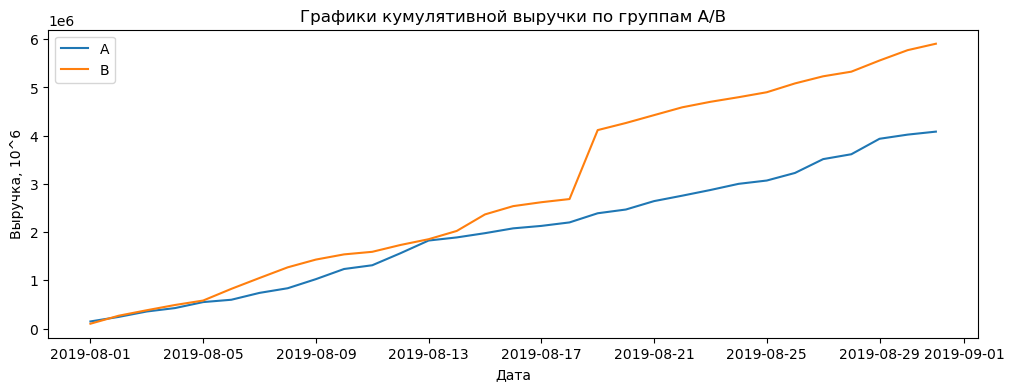

In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 4))
# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка, 10^6')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

<b> Вывод 2.1.1: </b> группа В стабильно показывает бОльшую выручку, чем А. Отмечаю резкий скачок 18 августа (возможно, это аномалия).

#### Кумулятивный средний чек по группам

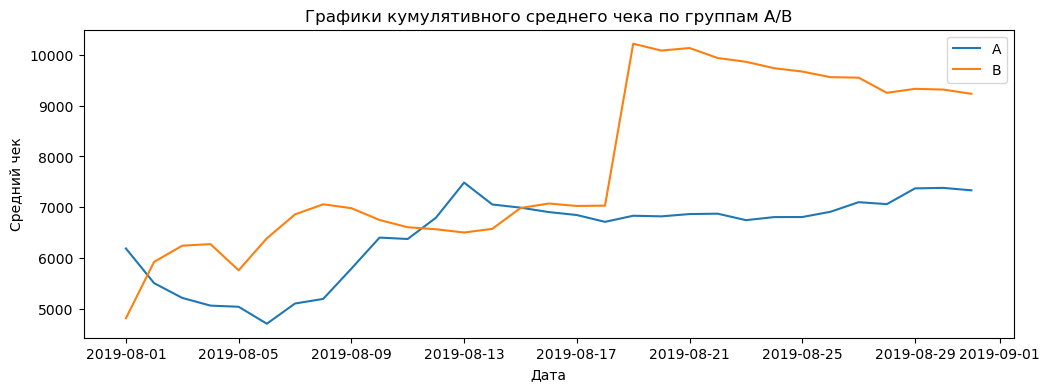

In [35]:
plt.figure(figsize=(12, 4))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.legend()
plt.show()

<b> Вывод 2.1.2: </b> средний чек группы В почти всё время выше, чем средний чек группы А (кроме 1 и 13 августа). Также отмечаю резкий скачок 18 августа (возможно, это аномалия).

#### Относительное изменение кумулятивного среднего чека группы B к группе A

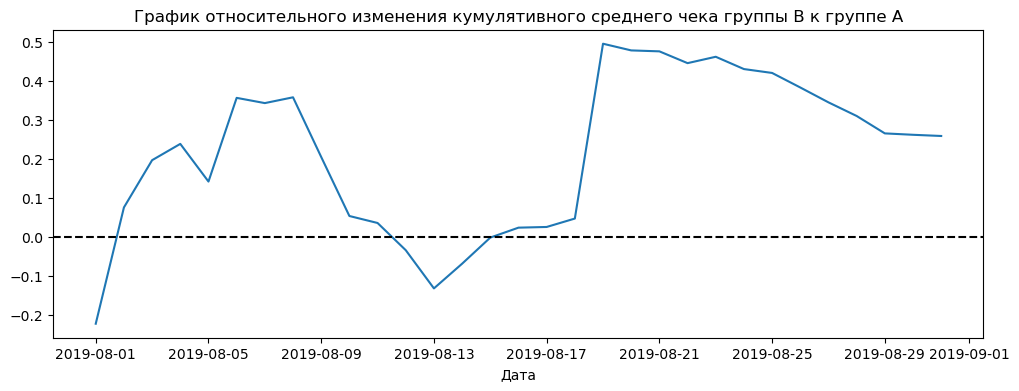

In [36]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = (
    cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(12, 4))
# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

<b> Вывод 2.1.3: </b> есть резкие изменения в графике, скорее всего из-за аномалий, необходимо будет проверить.

#### Кумулятивное среднее количества заказов на посетителя по группам

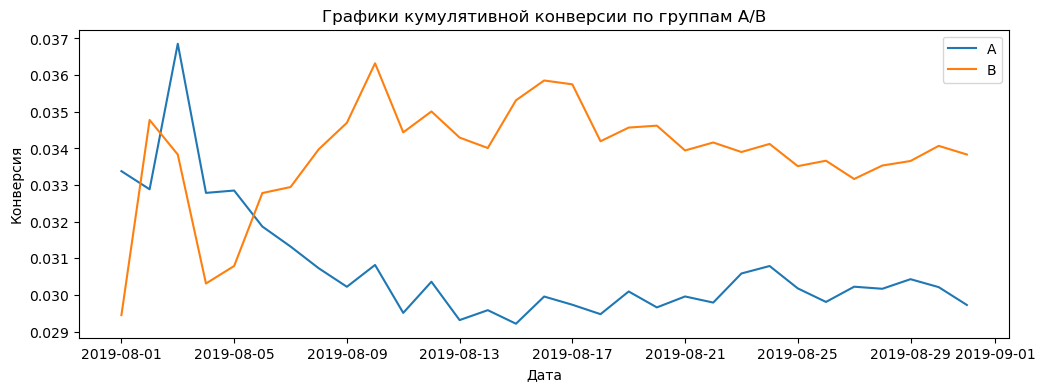

In [37]:
# то есть конверсия

# датафрейм с кумулятивной конверсией по дням в группе А
cummulativeConversionA = cummulativeData[cummulativeData['group']=='A'][['date','orders', 'visitors']]
cummulativeConversionA['conversion'] = cummulativeConversionA['orders'] / cummulativeConversionA['visitors']

# датафрейм с кумулятивной конверсией по дням в группе B
cummulativeConversionB = cummulativeData[cummulativeData['group']=='B'][['date','orders', 'visitors']]
cummulativeConversionB['conversion'] = cummulativeConversionB['orders'] / cummulativeConversionB['visitors']

plt.figure(figsize=(12, 4))
# Строим график выручки группы А
plt.plot(cummulativeConversionA['date'], cummulativeConversionA['conversion'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeConversionB['date'], cummulativeConversionB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Графики кумулятивной конверсии по группам A/B')
plt.legend()
plt.show()

<b> Вывод 2.1.4: </b> в первые дни (до 6 августа) группа А показывала бОльшую конверсию. Далее группа В показывает стабильно бОльшую конверсию, чем в группе А.

#### Относительные изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

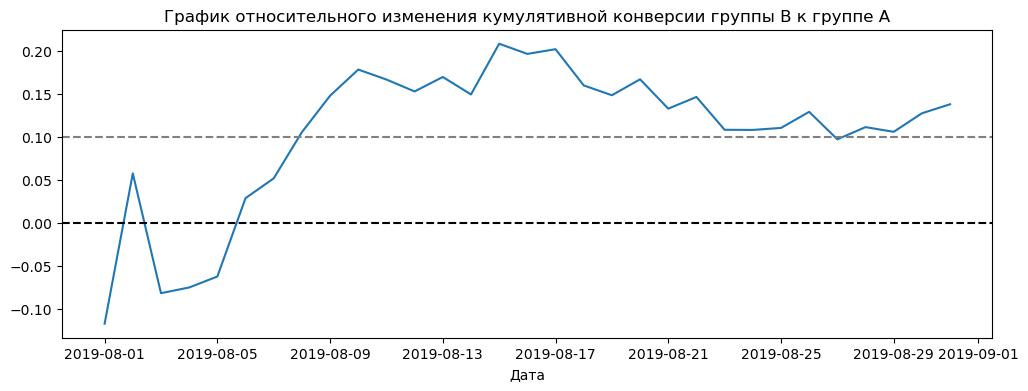

In [38]:
# собираем данные в одном датафрейме
mergedCummulativeConversion = (
    cummulativeConversionA.merge(cummulativeConversionB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(12, 4))
# cтроим отношение конверсий
plt.plot(mergedCummulativeConversion['date'], 
         (mergedCummulativeConversion['conversionB']/mergedCummulativeConversion['conversionA'])-1)
# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

<b> Вывод 2.1.5: </b> через 1 неделю с начала тестов конверсия группы В выше конверсии группы А на 10%, но конверсия не "устаканилась".

<b> Вывод 2.1: </b> изучены кумулятивные метрики. 
- Начиная со второй недели выручка группы В стабильно выше выручки группы А, при этом заметен резкий скачок 18 августа (скорее всего это аномальные значения - необходимо будет проверить). 
- Средний чек группы В со 2 августа выше среднего чека группы А, но отмечаются колебания: просадка с 12 по 15 августа и резкий скачок 18 августа. 
- Начиная со второй недели конверсия группы В стабильно выше конверсии группы А, но графики нестабильны. Необходимо исследовать на аномалии.

### Анализ выбросов

#### График количества заказов по пользователям

In [39]:
ordersByUsers = (
    orders.groupby('visitorId', as_index = False)
    .agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


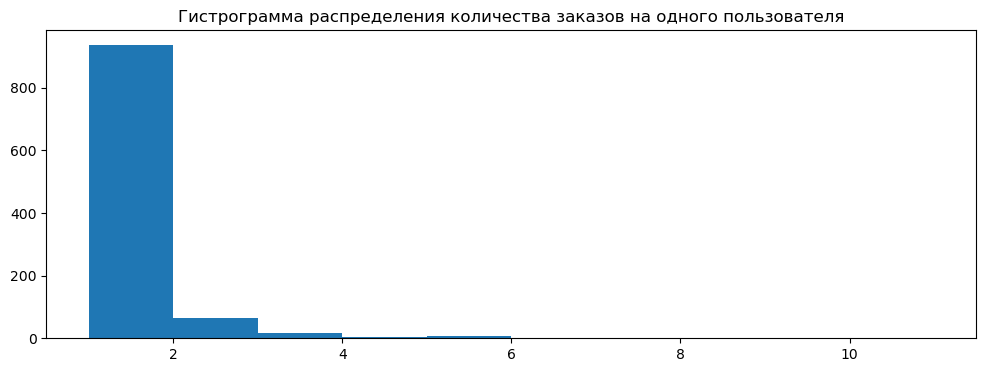

In [40]:
plt.figure(figsize=(12,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

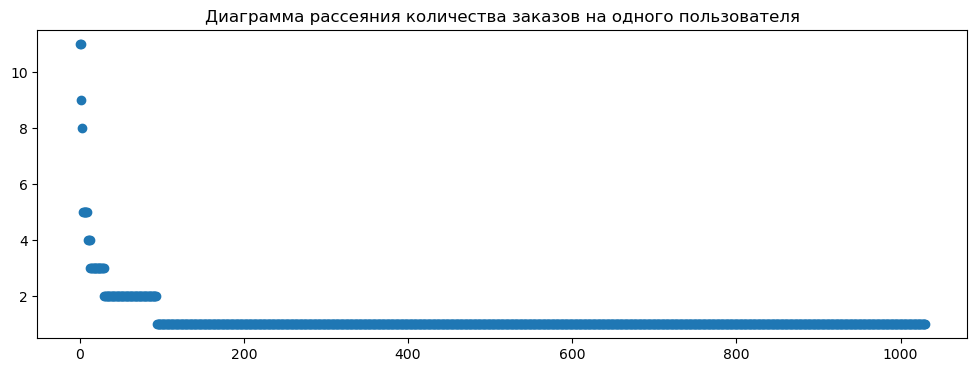

In [41]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма рассеяния количества заказов на одного пользователя')
plt.show()

<b> Вывод 2.2.1: </b> по графику видно, что бОльшая часть пользователей совершает 1 заказ.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [42]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95 - {}\n99 - {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95 - 2.0
99 - 4.0


<b> Вывод 2.2.2: </b> расчитала 95 и 99 перцентили количества заказов на пользователя. Получается, что 95% всех пользоватлей сделали 1 или 2 заказа, а остальные 5% - от 3 заказов.

In [43]:
orders_max = percentiles[0]

#### График стоимостей заказов

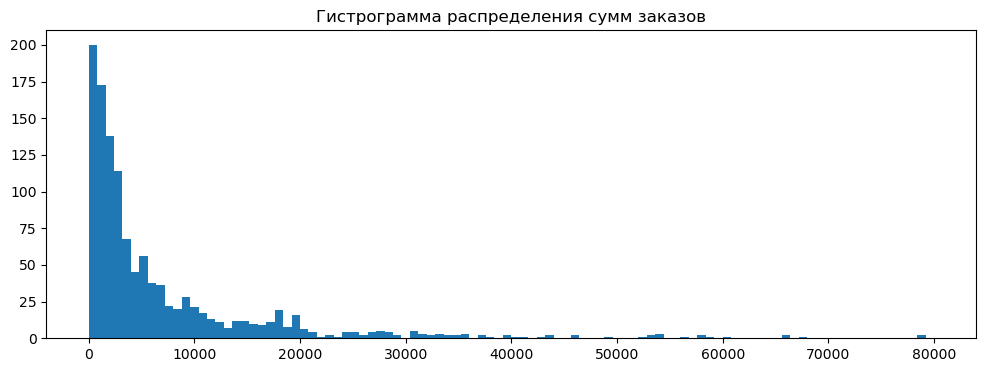

In [44]:
plt.figure(figsize=(12,4))
plt.hist(orders['revenue'], range = (0, 80000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов')
plt.show()

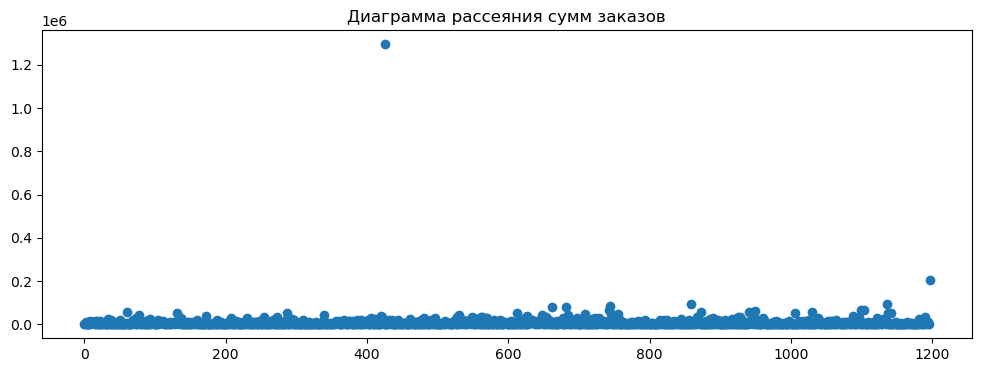

In [45]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(12,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния сумм заказов')
plt.show()

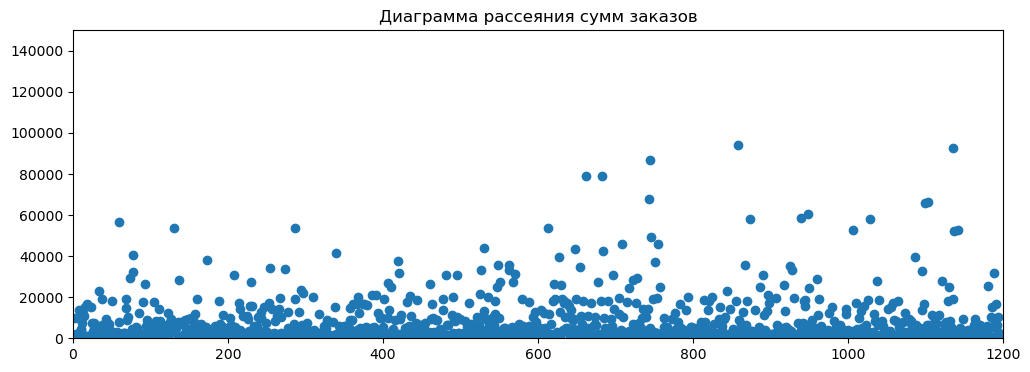

In [46]:
plt.figure(figsize=(12,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния сумм заказов')
plt.axis([0, 1200, 0, 150000])
plt.show()

<b> Вывод 2.2.3: </b> построила гистограмму и диаграмму рассеяния сумм заказов. Видно, что бОльшая часть заказов в пределах (0, 20000). Гистограмма похожа на распределение Пуассона (пик около 0 и линных хвост).

#### 95-й и 99-й перцентили стоимости заказов

In [47]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95 - {:.2f}\n99 - {:.2f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95 - 28000.00
99 - 58233.20


<b> Вывод 2.2.4: </b> расчитала 95 и 99 перцентили стоимости заказов. Получили, что только 5% заказов больше 28000. А 95% заказов в пределах (0, 28000).

In [48]:
revenue_max = percentiles[0]

<b> Вывод 2.2: </b> постоила гистограммы и диаграммы рассеяния для количества заказов на 1 пользователя и стоимости заказов, рассчитала 95 и 99 перцентили для этих же значений. Получила:
- 95% пользователей делали 1 или 2 заказа,
- 95% заказаов стоимостью до 28000.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [49]:
# установим уровень крит. значимости в 5%
alpha = 0.05

In [50]:
# датафреймы с количеством заказов на посетителя по группам
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

In [51]:
sampleA = (
    pd.concat([ordersByUsersA['orders'], 
               pd.Series(
                   0, 
                   index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), 
                   name='orders')], axis = 0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'], 
               pd.Series(
                   0, 
                   index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), 
                   name='orders')], axis=0)
)

<b> Гипотезы: </b>

H0: различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. НЕ значимы

Н1: различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. значимы

In [52]:
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. НЕ значимы')

p-value: 0.016792355056752608
Отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. значимы


In [53]:
print('Относительный прирост конверсии группы В относительно группы А - {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы В относительно группы А - 0.138


<b> Вывод 2.3: </b> получили, что различия в среднем количестве заказов на посетителя между группами по «сырым» данным стат. значимы.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

<b> Гипотезы: </b>

H0: различия в среднем чеке заказа между группами по «сырым» данным стат. НЕ значимы

Н1: различия в среднем чеке заказа между группами по «сырым» данным стат. значимы

In [54]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным стат. значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным стат. НЕ значимы')

p-value: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «сырым» данным стат. НЕ значимы


In [55]:
print('Относительный прирост ср. чека группы В относительно группы А - {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

Относительный прирост ср. чека группы В относительно группы А - 0.259


<b> Вывод 2.4: </b> получили, что различия в среднем чеке между группами по «сырым» данным стат. не значимы.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [56]:
# для начала очистим данные от выбросов: кол-во заказов пользователя не более 2 и сумма заказа не более 28000 (установили ранее)

# посчитаем сколько таких юзеров
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_max]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_max]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_max]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


Кол-во аномальных пользователей - 74. Посмотрим, как они могли повлиять на результат. Очистим данные:

In [57]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<b> Гипотезы: </b>

H0: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. НЕ значимы

Н1: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. значимы

In [58]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. НЕ значимы')

p-value: 0.013042592743036745
Отвергаем нулевую гипотезу: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. значимы


In [59]:
print('Относительный прирост конверсии группы В относительно группы А - {0:.3f}'
      .format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Относительный прирост конверсии группы В относительно группы А - 0.173


<b> Вывод 2.5: </b> получили, что различия в среднем количестве заказов на посетителя между группами по «очищенным» данным стат. значимы

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

<b> Гипотезы: </b>

H0: различия в среднем чеке заказа между группами по «очищенным» данным стат. НЕ значимы

Н1: различия в среднем чеке заказа между группами по «очищенным» данным стат. значимы

In [60]:
results = (
    stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                       orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])    
)

print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным стат. значимы')
else:
    print('Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным стат. НЕ значимы')

p-value: 0.738481751314565
Не получилось отвергнуть нулевую гипотезу: различия в среднем чеке заказа между группами по «очищенным» данным стат. НЕ значимы


In [61]:
print('Относительный прирост ср. чека группы В относительно группы А - {0:.3f}'
      .format(
          orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
          /orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1)
)

Относительный прирост ср. чека группы В относительно группы А - -0.020


<b> Вывод 2.6: </b> получили, что различия в среднем чеке между группами по «сырым» данным стат. не значимы.

<b> Вывод 2: </b> проанализированы результаты А/В-теста.

Сначала были проанализированы кумулятивные показатели:
- Начиная со второй недели выручка группы В стабильно выше выручки группы А. При этом есть резкий скачок 18 августа: либо увеличилось кол-во заказов, либо увеличилась сумма заказов. 
- Средний чек группы В со 2 августа выше среднего чека группы А, но отмечаются колебания.
- Начиная со второй недели конверсия группы В стабильно выше конверсии группы А.

Изучены выбросы в количестве заказов на пользователя и в стоимостях заказов. Оказалось:
- 5% пользователей совершали более 2 заказов, а 1% - более 4.
- 95% пользователей совершали 1 или 2 заказа.
- 5% заказов стоимостью более 28000, 1% - более 58233.
- Стоимость 95% заказов менее 28000.

Были выдвинуты гипотезы относительно среднего количества заказов на посетителя между группами:
- По «сырым» данным: различия статистически НЕ значимы,
- По «очищенным» данным: различия статистически НЕ значимы.

Оказалось, что различия по «сырым» и по «очищенным» данным статистически значимы. Прирост среднего количества заказов на поселителя в группе В относительно группы А по «сырым» данным - 13.8%, а по по «очищенным» - 17.3%.

Были выдвинуты гипотезы относительно среднего чека заказа между группами:
- По «сырым» данным: различия статистически НЕ значимы,
- По «очищенным» данным: различия статистически НЕ значимы.

Оказалось, что различия по «сырым» и по «очищенным» данным статистически не значимы. Прирост среднего чека заказа в группе В относительно группы А по «сырым» данным - 25.9%, а по «очищенным» - прирост отрицательный, -2%.

<b> Принятие решения по результатам теста </b>

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Выборка данных корректного объема, избежали проблемы подглядывания.

Кумулятивные метрики по выручке, среднему чеку, конверсии были выше у группы В почти всё время. 

Цель анализа - увеличение выручки интернет-магазина. Поэтому обращаем внимание на конверсию.

Конверсии групп А и В статистически различаются. Причем прирост конверсии группы В относительно группы А по "сырым" данным составляет 14%. Убрав выбросы, конверсия в группе В увеличилась даже больше - 17%.

Из этого можно принять решение по тесту: остановить тест, зафиксировав победу группы В.